In [1]:
# For Basic Operations
import numpy as np
import pandas as pd

# for Datetime Manipulation
import datetime

# For Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for Interactive Analysis
from ipywidgets import interact

In [2]:
# lets import the Dataset
data = pd.read_csv('movies.csv')

# lets check the shape of the dataset
data.shape

(9125, 3)

In [3]:
# lets check the head of the dataset
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# lets also check the ratings dataset
rating = pd.read_csv('ratings.csv')

# lets check the shape also
rating.shape

(100004, 4)

In [5]:
# lets check the head of the rating data
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
# As we are going to Perform the Content Based Filtering
# lets merge the rating data with the movie data
data = pd.merge(data, rating, on = 'movieId', how = 'inner')

# lets check the shape of the Merged Dataset
data.shape

(100004, 6)

In [7]:
# Lets check the Head of the Merged Dataset
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091


In [8]:
# As we do not Require the MovieId, UserId and Timestamp lets remove them
data = data.drop(['movieId', 'userId', 'timestamp'], axis = 1)

# lets check the head of the Final Dataset
data.head()

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0


In [9]:
# Now, We Have to Groupby the Dataset Based on the Movie Title

data = pd.pivot_table(data, index = ['title','genres'], aggfunc = 'mean')
data.reset_index(level=['title','genres'], inplace = True)
data.head()

,title,genres,rating
0,"""Great Performances"" Cats (1998)",Musical,1.750000
1,$9.99 (2008),Animation,3.833333
2,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,2.000000
3,'Neath the Arizona Skies (1934),Western,0.500000
4,'Round Midnight (1986),Drama|Musical,2.250000


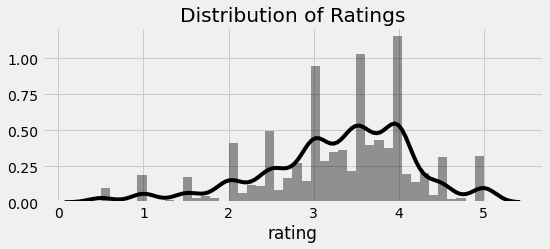

In [10]:
# lets check the Distribution of Ratings across the Movies

plt.rcParams['figure.figsize'] = (8, 3)
plt.style.use('fivethirtyeight')
sns.distplot(data['rating'], color = 'black')
plt.title('Distribution of Ratings')
plt.show()

In [11]:
# Lets Extract Year of Release from the Movie Title
data['y'] = data['title'].str.split(' ')
data['year'] = data['y'].apply(lambda x: x[-1])

# lets drop the unnecessary 'y' column from the dataset
data = data.drop(['y'], axis = 1)

# lets remove the Opening and Closing Brackets from the String
data['year'] = data['year'].str.strip(')')
data['year'] = data['year'].str.strip('(')

# lets check the Values After Extraction
pd.set_option('max_rows', 110)
data['year'].value_counts()

1996         274
2002         272
1998         272
2000         272
1997         267
2001         267
1995         266
1999         261
2006         259
2009         255
2007         254
2008         247
2004         247
1994         240
2003         237
2005         233
2011         227
2010         227
2013         220
2012         219
2014         216
1993         198
2015         173
1988         164
1987         152
1992         149
1989         147
1990         142
1991         137
1986         129
1985         125
1982         102
1984          99
1981          99
1980          97
1983          81
1979          72
1978          62
1977          61
2016          59
1974          57
1971          54
1967          52
1976          51
1973          51
1975          49
1955          49
1972          48
1966          48
1963          47
1964          45
1968          45
1960          45
1965          42
1970          42
1962          41
1959          40
1957          40
1969          

In [12]:
# There are some Dirty Values, Let's Clean them
data['year'] = data['year'].replace(('2007-','Despot','Things', '1975-1979','Road', ''),
                                   ('2007','2016','2016','1979','2002','1996'))

# lets convert the year column into Integer data type
data['year'] = data['year'].astype(int)

# lets check the head of the dataset again
data.head()

,title,genres,rating,year
0,"""Great Performances"" Cats (1998)",Musical,1.750000,1998
1,$9.99 (2008),Animation,3.833333,2008
2,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,2.000000,2004
3,'Neath the Arizona Skies (1934),Western,0.500000,1934
4,'Round Midnight (1986),Drama|Musical,2.250000,1986


In [13]:
# lets remove the Year from the Movie Titles
data['title'] = data['title'].str.split(' ')
data['title'] = data['title'].apply(lambda x: ' '.join(x[:-1]))


# lets check the head of the dataset again
data.head()

,title,genres,rating,year
0,"""Great Performances"" Cats",Musical,1.750000,1998
1,$9.99,Animation,3.833333,2008
2,'Hellboy': The Seeds of Creation,Action|Adventure|Comedy|Documentary|Fantasy,2.000000,2004
3,'Neath the Arizona Skies,Western,0.500000,1934
4,'Round Midnight,Drama|Musical,2.250000,1986


In [14]:
# Lets check the Latest Movies - the Last Year mentioned in the Dataset is 2016
data[data['year'] == 2016][['title','rating']].sort_values(by = 'rating',
                ascending = False).head(10).reset_index(drop = True).style.background_gradient(cmap = 'Wistia')

,title,rating
0,Ben-hur,5.000000
1,The Beatles: Eight Days a Week - The Touring Years,5.000000
2,Rustom,5.000000
3,Me Before You,5.000000
4,Ice Age: The Great Egg-Scapade,5.000000
5,The Lovers and the,4.500000
6,Stranger,4.500000
7,Kung Fu Panda 3,4.333333
8,Jason Bourne,4.250000
9,Sherlock: The Abominable Bride,4.166667


In [15]:
# lets Check the Number of Movies that got 5 Star Reviews and Less than 1 Star Reviews

print("The Number of Movies that received 5 Star Reviews :", data[data['rating'] == 5]['title'].count())
print("Percentage of Movies Getting 5 Star Reviews : {0:.2f}%".format((data[data['rating'] == 5]['title'].count())/
                                                                      (data.shape[0])))
print("\nThe Number of Movies that received less than 1 Star Reviews :", data[data['rating'] <= 1]['title'].count())
print("The Percentage of Movies Getting Less than 1 Star Reviews : {0:.2f}%".format((
    data[data['rating'] <= 1]['title'].count())/(data.shape[0])))

The Number of Movies that received 5 Star Reviews : 315
Percentage of Movies Getting 5 Star Reviews : 0.03%

The Number of Movies that received less than 1 Star Reviews : 287
The Percentage of Movies Getting Less than 1 Star Reviews : 0.03%


In [16]:
# lets create an Interactive Function to get the List of Best Movies from Each Genre

@interact
def genre(Genre = ['Action', 'Adventure', 'Animation','Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance','Sci-Fi', 'Thriller', 'War', 'Western'], year = 2000):
    x = data['genres'].str.split('|')
    d = data.drop(['genres'], axis = 1)
    x = pd.concat([d, x], axis = 1)
    x = x.explode('genres')
    x= x[(x['genres'] == Genre) & (x['year'] >= year)][['title', 'rating', 'year']].sort_values(by = 'rating',
                            ascending = False).reset_index(drop = True).head(10)
    return x

interactive(children=(Dropdown(description='Genre', options=('Action', 'Adventure', 'Animation', 'Children', '…

In [490]:
#!pip install mlxtend

In [17]:
from mlxtend.preprocessing import TransactionEncoder

# lets split all the Genres into Transactions
genres = data['genres'].str.split('|')
te = TransactionEncoder()
genres = te.fit_transform(genres)
genres = pd.DataFrame(genres, columns = te.columns_)

genres.head(2)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
# lets convert this data into boolean so that we can perform calculations
genres = genres.astype('int')
genres.insert(0, 'title', data['title'])
genres.head(2)

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,"""Great Performances"" Cats",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,$9.99,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# lets Transpose the Dataset
genres = genres.transpose()
genres = genres.rename(columns = genres.iloc[0])
genres = genres.drop(genres.index[0])
genres = genres.astype(int)

# lets check the head of genres
genres.head(2)

,"""Great Performances"" Cats",$9.99,'Hellboy': The Seeds of Creation,'Neath the Arizona Skies,'Round Midnight,'Salem's Lot,'Til There Was You,"'burbs, The",'night Mother,(500) Days of Summer,...,Zulu,Zulu,[REC],eXistenZ,loudQUIETloud: A Film About the Pixies,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us),İtirazım Var
(no genres listed),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,0,0,1


In [20]:
# making a recommendation engine for getting similar movies

@interact
def recommendation_movie(movie = list(genres.columns)):    
    similar_movies = genres.corrwith(genres[movie])
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

interactive(children=(Dropdown(description='movie', options=('"Great Performances" Cats', '$9.99', "'Hellboy':…